In [2]:
import sys
import os
import pandas as pd
import numpy as np
import pymc

sys.path.append(f'{os.path.dirname(os.path.dirname(os.getcwd()))}/draft_pick_prob')

In [8]:
#draft_df=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2021_validation/2021_draft_order.csv')
draft_df = pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2021_validation/2021_draft_order.csv', encoding='ISO-8859-1')


mock_draft_df=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2021_validation/22Jun_2021_Wheeler_bigboard.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_WHEL_JUN22'})
mock_draft_df_2=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2021_validation/21Jun_2021_PronWhel_bigboard.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_PW_JUN21'})
mock_draft_df_3=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2021_validation/15Jun_2021_Pronman_bigboard.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_PRON_JUN21'})


possible_players=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2021_validation/2021_PLAYER_IDS.csv',encoding='ISO-8859-1')

In [23]:
draft_df=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2021_validation/2021_draft_order.csv',encoding='ISO-8859-1')

file_list =['15Jun_2021_Pronman_bigboard.csv','21Jun_2021_PronWhel_bigboard.csv','15Jun_2021_Pronman_bigboard.csv']

mock_draft_dfs = []

for filename in file_list:
    df = pd.read_csv(filename)  # Read the CSV file
    
    # Sort the DataFrame by 'RANK' column
    df = df.sort_values(by='RANK')
    
    # Check if 'RANK' increases by 1 each time
    is_consecutive = df['RANK'].diff() == 1
    
    # Use a mask to filter the DataFrame to keep only consecutive ranks
    df = df[is_consecutive]
    
    prefix = filename[5:7]
        
    # Rename the 'RANK' column based on the extracted prefix
    df = df.rename(columns={'RANK': f'RANK_{prefix}_22'})
    
    mock_draft_dfs.append(df)  # Add the processed DataFrame to the list



possible_players=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022PLAYER_IDS.csv')
draft_df

,ORDER,PLAYER_NAME,PLAYER_ID
0,1,Owen Power,1
1,2,Matty Beniers,2
2,3,Mason McTavish,3
3,4,Luke Hughes,4
4,5,Kent Johnson,5
...,...,...,...
218,220,Taylor Makar,220
219,221,Tomas Machu,221
220,222,Carl Lindbom,222
221,223,Sam Lipkin,223


In [16]:
import math
df_player_rankings=possible_players[['PLAYER_ID']].merge(mock_draft_df[['PLAYER_ID','RANK_WHEL_JUN22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_2[['PLAYER_ID','RANK_PW_JUN21']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_3[['PLAYER_ID','RANK_PRON_JUN21']], how='left', on=['PLAYER_ID'])

'''
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[3][['PLAYER_ID','RANK_BM_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[4][['PLAYER_ID','RANK_CB_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[5][['PLAYER_ID','RANK_DH_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[6][['PLAYER_ID','RANK_DP_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[7][['PLAYER_ID','RANK_MP_22']], how='left', on=['PLAYER_ID'])

df_player_rankings=df_player_rankings.merge(mock_draft_dfs[8][['PLAYER_ID','RANK_PA_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[9][['PLAYER_ID','RANK_PL_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[10][['PLAYER_ID','RANK_RS_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[11][['PLAYER_ID','RANK_SN_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[12][['PLAYER_ID','RANK_SS_22']], how='left', on=['PLAYER_ID'])

df_player_rankings=df_player_rankings.merge(mock_draft_df_14[['PLAYER_ID','RANK_PRONMAN_JUNE_21']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_15[['PLAYER_ID','RANK_WHEELER_JUNE_27']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_16[['PLAYER_ID','RANK_WHEELER_JUNE_13']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_17[['PLAYER_ID','RANK_STAFF_JUNE_14']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_18[['PLAYER_ID','RANK_PRONMAN_MAY_8']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_19[['PLAYER_ID','RANK_WHEELER_MAY_10']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_20[['PLAYER_ID','RANK_PRONMAN_MAY_11']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_21[['PLAYER_ID','RANK_PRONMAN_MAY_30']], how='left', on=['PLAYER_ID'])
'''
df_player_rankings

,PLAYER_ID,RANK_WHEL_JUN22,RANK_PW_JUN21,RANK_PRON_JUN21
0,1,1.0,1.0,1.0
1,2,4.0,2.0,5.0
2,3,10.0,7.0,9.0
3,4,7.0,6.0,4.0
4,5,2.0,9.0,6.0
...,...,...,...,...
222,223,NaN,NaN,NaN
223,224,NaN,NaN,114.0
224,225,NaN,NaN,57.0
225,226,NaN,NaN,68.0


In [17]:
def likelihood(strengths, rankings):
    # params: vector of parameters [intercept, slope]
    likelihood=1
    counter=1
    paired_lists = list(zip(strengths, rankings))
    sorted_pairs = sorted(paired_lists, key=lambda x: x[1])
    sorted_list1, sorted_list2 = zip(*sorted_pairs)
    while counter<len(sorted_list2)+1 and sorted_list2[counter]!=sorted_list2[counter+1]:
        # print(np.exp(sorted_list1[counter-1]))
        # print(np.sum(np.exp(sorted_list1[counter-1:])))
        # print(np.exp(sorted_list1[counter-1])/np.sum(np.exp(sorted_list1[counter-1:])))
        likelihood+=np.log(np.exp(sorted_list1[counter-1])/np.sum(np.exp(sorted_list1[counter-1:])))
        counter+=1
    return likelihood

def neg_log_likelihood(params, df):
    neg_ll=1
    columns_to_go_through=df.columns[1:]
    for i in columns_to_go_through:
        max=df[i].max()+1
        player_rank=list(df[i])
        fixed_player_rank=[max if math.isnan(x) else x for x in player_rank]
        neg_ll-=likelihood(params, fixed_player_rank)
    return neg_ll

In [18]:
def constraint_eq(x):
    return sum(x)

In [19]:
import scipy.optimize

counter=40
l_play=[]
variable_bounds=[]
count=0

while count<len(df_player_rankings):
    l_play.append(counter)
    count+=1
    counter-=0.20
    variable_bounds.append((-40,40))

result = scipy.optimize.minimize(neg_log_likelihood, l_play, args=(df_player_rankings,), method='SLSQP', bounds=variable_bounds, constraints={'type': 'eq', 'fun': constraint_eq})
print(result.x)

[ 33.76837011  22.84998716  19.74322629  21.64740953  20.81952085
  18.70717754  22.98006322  21.53179644  22.37625241   9.94065124
 -36.64771337  17.10831044  16.39659453  13.38231173  16.16812774
  14.96892222  12.79996251  19.19473461  13.24552409  18.54376133
  15.98276184  14.124147    10.79390671  11.92666352  14.49094758
  15.77980294  12.55165836  14.27591084   9.39131675  12.43019077
   4.82310161   7.57260554  11.03302391  11.3325576  -16.09612487
   8.82983417   6.17394514  11.62716756 -15.85246242   8.29090452
   8.6973369   13.24249918   6.02223752   9.77663703   9.29389326
  12.62902788  14.04773466   7.71908319   4.86524191  14.22077367
   9.74853982  15.99129594  10.49550716  10.49284531   7.32867137
   9.62669103   9.25919821   8.69272087   8.97614731   6.72236412
  11.4009392    8.51032446   8.84153542   8.52772092   6.07812545
  13.09829525   8.61190805  11.37138273  11.30612633 -10.38364784
  11.42970246   9.89287054   9.64619503  -7.64201683   9.46503798
  -7.11669

In [20]:
player_ability_parameters_df=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022PLAYER_IDS.csv')
player_ability_parameters_df['ABILITY_PARAMS']=result.x
player_ability_parameters_df=player_ability_parameters_df.sort_values(by='ABILITY_PARAMS', ascending=False, axis=0)
player_ability_parameters_df['SIM_RANK'] = range(1, len(player_ability_parameters_df) + 1)
player_ability_parameters_df.head(10)

,PLAYER_NAME,PLAYER_ID,ABILITY_PARAMS,SIM_RANK
0,Juraj Slafkovský,1,33.768370,1
6,Kevin Korchinski,7,22.980063,2
1,Simon Nemec,2,22.849987,3
8,Matthew Savoie,9,22.376252,4
3,Shane Wright,4,21.647410,5
7,Marco Kasper,8,21.531796,6
4,Cutter Gauthier,5,20.819521,7
2,Logan Cooley,3,19.743226,8
17,Lian Bichsel,18,19.194735,9
5,David Jiricek,6,18.707178,10


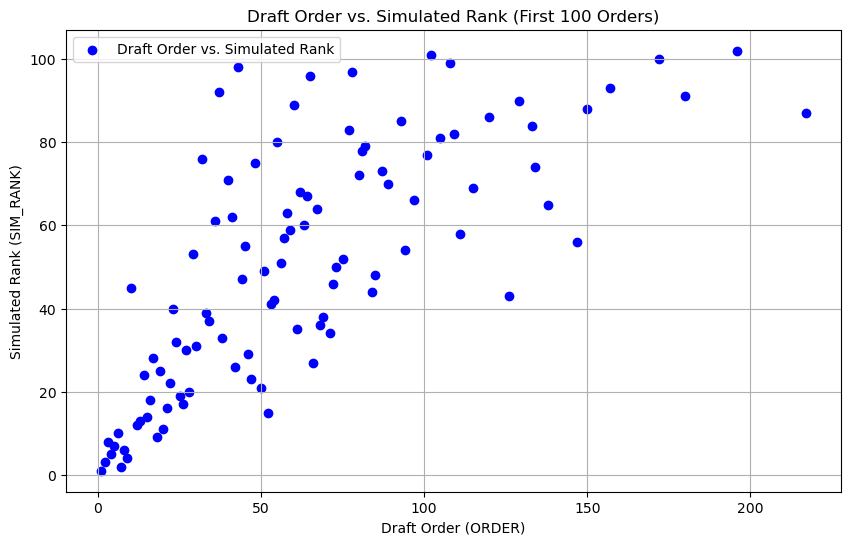

In [25]:
import matplotlib.pyplot as plt

# Assuming you have DataFrames: draft_df and player_ability_parameters_df

# Merge the two DataFrames on the 'PLAYER_NAME' column
merged_df = player_ability_parameters_df.merge(draft_df[['PLAYER_NAME', 'ORDER',"PLAYER_ID"]], on='PLAYER_ID')

# Filter the data for the first 100 orders
merged_df_first_100 = merged_df.head(100)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df_first_100['ORDER'], merged_df_first_100['SIM_RANK'], c='blue', label='Draft Order vs. Simulated Rank')
plt.xlabel('Draft Order (ORDER)')
plt.ylabel('Simulated Rank (SIM_RANK)')
plt.title('Draft Order vs. Simulated Rank (First 100 Orders)')
plt.grid(True)
plt.legend()

plt.show()


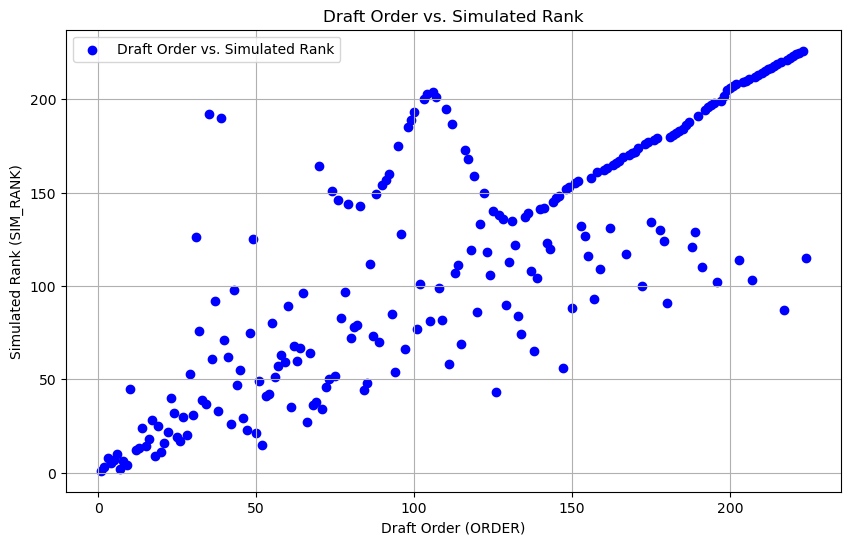

In [26]:
import matplotlib.pyplot as plt

# Assuming you have DataFrames: draft_df and player_ability_parameters_df

# Merge the two DataFrames on the 'PLAYER_NAME' column
merged_df = player_ability_parameters_df.merge(draft_df[['PLAYER_NAME', 'ORDER',"PLAYER_ID"]], on='PLAYER_ID')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['ORDER'], merged_df['SIM_RANK'], c='blue', label='Draft Order vs. Simulated Rank')
plt.xlabel('Draft Order (ORDER)')
plt.ylabel('Simulated Rank (SIM_RANK)')
plt.title('Draft Order vs. Simulated Rank')
plt.grid(True)
plt.legend()

plt.show()
